# NLP Assignment 1
Created by Prof. [Mohammad M. Ghassemi](https://ghassemi.xyz)

Submitted by: <span style="color:red"> Safoora Masoumi </span>


<hr> 

## Assignment Goals
The goal of this assignment is to familiarize yourself with:
1. Regular expressions, 
2. Text normalization, 
3. Edit distance, 
4. N-gram language models and smoothing 

This assignment combines tutorial components, with learning exercises that you must complete and submit. The learning exercise sections are clearly demarcated within the assignments.

## Assumptions
BEFORE YOU START

1. PULL THE LATEST VERSION OF THE `course-materials` REPOSITORY, AND COPY `homework/HW1/` INTO THE CORRESPONDING DIRECTORY. 
2. CREATE AND ATTACHED TO A VIRTUAL ENVIRONMENT, AND INSTALLED THE REQUIREMENTS IN `requirements.txt`



<hr>

# Part 0: Collecting Data


Before we can perform any text analysis, we will need to collect some text to apply our analysis to! One excellent resource for free text data is [Project Gutenburg](https://www.gutenberg.org/) (PG); PG contains ~60,000 free eBooks in a variety of formats including the very easy to use `.txt` format. Let's start by pulling [Bertrand Russell's](https://plato.stanford.edu/entries/russell/) book on [The Problems of Philosophy](http://www.gutenberg.org/cache/epub/5827/pg5827.txt) directly from the internet to our machines using [Python's requests library](https://requests.readthedocs.io/en/master/). The requests library is a powerful tool for extracting text data from the internet. Given that most contemporary text data is on the web, it's a tool you should become familiar with:

In [21]:
import requests
website = 'http://www.gutenberg.org/cache/epub/5827/pg5827.txt'
site    = requests.get(website)

In [22]:
print('\n')
print('--------------------------------------------------------')
print('Server status code: ' + str(site.status_code))
print('--------------------------------------------------------')
print('Here is a 250 character sample of your text:')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(site.text[1500:1750])
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Server status code: 200
--------------------------------------------------------
Here is a 250 character sample of your text:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
wledge in the world which is so certain that no
reasonable man could doubt it? This question, which at first sight might
not seem difficult, is really one of the most difficult that can
be asked. When we have realized the obstacles in the way of a
--------------------------------------------------------




The requests object returned a server status code of `200`, and placed the text we requested in `r.text`. The status code is the server's way of telling us `OK` but note that servers can also refuse to serve us; If we request another resources that doesn't exist from Guttenburg for example, it will respond differently. Let's ask for a new book called `idontthinkyouhavethisbook.txt`

In [23]:
website = 'http://www.gutenberg.org/cache/epub/5827/idontthinkyouhavethisbook.txt'
r = requests.get(website)

In [24]:
print('\n')
print('--------------------------------------------------------')
print('Server status code: ' + str(r.status_code))
print('--------------------------------------------------------')
print('Here is a 250 character sample of your text:')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(r.text[1500:1750])
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Server status code: 404
--------------------------------------------------------
Here is a 250 character sample of your text:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
_logo"> -->
  <a id="main_logo" href="/" class="no-hover">
    <img src="/gutenberg/pg-logo-129x80.png" alt="Project Gutenberg" draggable="false" />
  </a>
  <!--	</div>-->
  <div id="menu">
    <label for="tm" id="toggle-menu">Menu<span class="drop-
--------------------------------------------------------




Now the server returned a `404` status code, which is it's way of telling us `Not Found`. Sure enough, the content that was returned in `r.text` is the error page of Project Guttenburg, not the book we requested. I point this out because when you collect your own data from the internet, especially large volumes of data, you will want to pay attention to those server status codes to make sure what you requested is what you obtained. To learn more about server codes, you can see this [this page](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status).

<hr> 

# Part 1: Regular Expressions

A regular expression is a compact programming language that is specialized for enhanced text search. We can import the `re` library, which comes standard with the Python programming language, to analyze the book we pulled from Project Guttenburg in part 0.

In [25]:
import re

In [26]:
regular_expression = 'philosophy'
text               = site.text
results            = re.search(regular_expression,text)

In [27]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('A match for the search query: "' + results.group() + '"\nwas found at the following character span: ' + str(results.span()))
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
A match for the search query: "philosophy"
was found at the following character span: (764, 774)
--------------------------------------------------------




The above example finds the first instance of the word `philosophy` in the book. For some purposes, we may want to capture *every instance* where the search term was mentioned in a text. We can accomplish that using the `re.finditer` function, and packaging our results in a neat list of dictionaries that contain the matching string and the location of the match:

In [28]:
# collect all the mentions of the search term
regular_expression = 'philosophy'
results            = [ {"indicies":m.span(), "match":m.group() } for m in re.finditer(regular_expression,text)];
matches            = []; [matches.append(m['match']) for m in results];

In [29]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('We found ' +  str(len(matches)) + ' matches...\n')
print(str(results))
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
We found 72 matches...

[{'indicies': (764, 774), 'match': 'philosophy'}, {'indicies': (1833, 1843), 'match': 'philosophy'}, {'indicies': (1849, 1859), 'match': 'philosophy'}, {'indicies': (5109, 5119), 'match': 'philosophy'}, {'indicies': (19891, 19901), 'match': 'philosophy'}, {'indicies': (21170, 21180), 'match': 'philosophy'}, {'indicies': (33483, 33493), 'match': 'philosophy'}, {'indicies': (33560, 33570), 'match': 'philosophy'}, {'indicies': (33849, 33859), 'match': 'philosophy'}, {'indicies': (50321, 50331), 'match': 'philosophy'}, {'indicies': (54760, 54770), 'match': 'philosophy'}, {'indicies': (103297, 103307), 'match': 'philosophy'}, {'indicies': (109118, 109128), 'match': 'philosophy'}, {'indicies': (122400, 122410), 'match': 'philosophy'}, {'indicies': (122529, 122539), 'match': 'philosophy'}, {'indicies': (125952, 125962), 'match': 'philosophy'}, {'i

We found `72` matches for the search term. That seems a bit low for a book with the word philosophy in it's name! Let's update our regular expression so that it's not sensitive to capitalization of the letter `p`.

In [30]:
# collect all the mentions of the search term
regular_expression = '(p|P)hilosophy'
results            = [ {"indicies":m.span(), "match":m.group() } for m in re.finditer(regular_expression,text)];
matches            = []; [matches.append(m['match']) for m in results];

In [31]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('We found ' +  str(len(results)) + ' matches...\n')
print(str(matches))
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
We found 81 matches...

['Philosophy', 'Philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'Philosophy', 'philosophy', 'philosophy', 'Philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'Philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'Philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy

We found `81` matches; that is not much better than before. Let's make the search even more general by seeking out terms that start with the word `philo`, followed by an arbitrary number of [a-z] characters thereafter.

In [32]:
regular_expression = '(P|p)hilo[a-z]+'
results            = [ {"indicies":m.span(), "match":m.group() } for m in re.finditer(regular_expression,text)];
matches            = []; [matches.append(m['match']) for m in results];

In [33]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('We found ' +  str(len(matches)) + ' matches...\n')
print(str(matches))
print('--------------------------------------------------------')
print('We found ' +  str(len(set(matches))) + ' distinct terms...\n')
print(class_utils.CountFrequency(matches))
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
We found 154 matches...

['Philosophy', 'Philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosopher', 'philosopher', 'Philonous', 'Philonous', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'Philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosophical', 'Philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophical', 'philosopher', 'philosophical', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophy', 'philosophical', 'philosopher', 'philosophy', 'philosopher', 'philosophy', 'philosopher', 'philosophy', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosopher', 'philosophers', 'philosophy', 'philosophy', 'philosophical', 'philosophers', 'philosophy', 'philosophy', 'philosophers', 'philo

NameError: name 'class_utils' is not defined

That looks better! But now we have a new problem. It seems that an inconveniently named philosopher, `Philonous`, has made his way into our results. Let's modify our regular expression to use a `negative lookahead` `(?!nous)` to remove him.

In [34]:
regular_expression = '(P|p)hilo(?!nous)[a-z]+'
results            = [ {"indicies":m.span(), "match":m.group() } for m in re.finditer(regular_expression,text)];
matches            = []; [matches.append(m['match']) for m in results];

In [35]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('We found ' +  str(len(matches)) + ' matches...\n')
print(str(matches))
print('--------------------------------------------------------')
print('We found ' +  str(len(set(matches))) + ' distinct terms...\n')
print(class_utils.CountFrequency(matches))
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
We found 151 matches...

['Philosophy', 'Philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosopher', 'philosopher', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'Philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosophical', 'Philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophical', 'philosopher', 'philosophical', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophy', 'philosophical', 'philosopher', 'philosophy', 'philosopher', 'philosophy', 'philosopher', 'philosophy', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosopher', 'philosophers', 'philosophy', 'philosophy', 'philosophical', 'philosophers', 'philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophers', 'p

NameError: name 'class_utils' is not defined

<hr> 

## Learning Exercise 1: 
#### Worth 1/5 Points
Now I'm curious how Bertrand used these various philosophical terms in his sentences, and how Bertrand's language, more generally, compares to [Friedrich Nietzsche](https://en.wikipedia.org/wiki/Friedrich_Nietzsche) and other philosophers. You're going to help me with that!

#### A. Download Data
Use Python's `requests` library to collect Friedrich Nietzsche's book, [Beyond Good and Evil](http://www.gutenberg.org/cache/epub/4363/pg4363.txt) into Python. Collect one additional work of philosophy (of your choice) and import it as well.

In [36]:
website0 = 'http://www.gutenberg.org/cache/epub/4363/pg4363.txt'
site0    = requests.get(website0)

In [37]:
print('\n')
print('--------------------------------------------------------')
print('Server status code: ' + str(site0.status_code))
print('--------------------------------------------------------')
print('Here is a 250 character sample of your text:')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(site0.text[5000:5250])
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Server status code: 200
--------------------------------------------------------
Here is a 250 character sample of your text:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
antiquity, Plato? Had the wicked
Socrates really corrupted him? Was Socrates after all a corrupter of
youths, and deserved his hemlock?" But the struggle against Plato,
or--to speak plainer, and for the "people"--the struggle against
the ecclesia
--------------------------------------------------------




In [38]:
website1 = 'https://www.gutenberg.org/cache/epub/2680/pg2680.txt'
site1    = requests.get(website1)

In [39]:
print('\n')
print('--------------------------------------------------------')
print('Server status code: ' + str(site1.status_code))
print('--------------------------------------------------------')
print('Here is a section of the Great Emperor Marcus Aurelius Antoninus Meditations:')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(site1.text[4913:5600])
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Server status code: 200
--------------------------------------------------------
Here is a section of the Great Emperor Marcus Aurelius Antoninus Meditations:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
In Rome itself there
was pestilence and starvation, the one brought from the east by Verus's
legions, the other caused by floods which had destroyed vast quantities
of grain. After all had been done possible to allay famine and to supply
pressing needs--Marcus being forced even to sell the imperial jewels to
find money--both emperors set forth to a struggle which was to continue
more or less during the rest of Marcus's reign. During these wars, in
169, Verus died. We have no means of following the campaigns in detail;
but thus much is certain, that in the end the Romans succeeded in
crushing the barbarian tribes, and effecting a settlement which made the
empire more se
-----------------------------------------------

<span style="color:red"> INSERT AN INTERPRETATION OF YOUR RESULTS HERE </span>

#### B. Basic Text Cleansing
Use `re.sub` to do some basic text cleansing on books you downloaded. More specifically: 

1. replace the various forms of whitespace that appear (`\n`,`\r`,`\t` etc.) with a single whitespace character. 
2. cast all text to lower case
3. replace common abbreviations with their full form, for instance: `it's` with `it is`

Note that item #3 does not have to be comprehensive, just do a couple common abbreviations to illustrate that you know how to do this.

In [40]:
textWS=re.sub("\s+", " ", site1.text)
ltext=textWS.lower()
#print(ltext)
abb=re.sub(r"won\'t", "will not", ltext)
abb1=re.sub(r"it\'s", "it is", abb)
abb2=re.sub(r"\'s", " is", abb1)
abb3=re.sub(r"\'ll", " will", abb2)


In [41]:
textws=re.sub("\s+", " ", site0.text)
texts=textws.lower()
abbs=re.sub(r"\ve", " have", texts)
abb4=re.sub(r"it\'s", "it is", abbs)
abb5=re.sub(r"can\'t", "cannot", abb4)
abb6=re.sub(r"\'t", " not", abb5)


#### C. Sentence Extractor
Write a regular expression that will extract the complete sentences containing any matches of the following regex we wrote together earlier: `(P|p)hilo(?!nous)[a-z]+`. Apply this regular expression to "Beyond Good and Evil", "The Problems of Philosophy", and the work of philosophy you chose. Show a couple of example sentences from each work.

In [42]:
regular_expression= "[^.]*(P|p)hilo(?!nous)[a-z][^.]*\."
text=site.text
text=(re.sub("\s+", " ", site.text)).lower()
results = [ {"match":m.group() } for m in re.finditer(regular_expression,text)];
matches= []; [matches.append(m['match']) for m in results];
print("The Problems of Philosophy:",matches[96:99])

The Problems of Philosophy: [' but it cannot be maintained that philosophy has had any very great measure of success in its attempts to provide definite answers to its questions.', ' but if you put the same question to a philosopher, he will, if he is candid, have to confess that his study has not achieved positive results such as have been achieved by other sciences.', ' it is true that this is partly accounted for by the fact that, as soon as definite knowledge concerning any subject becomes possible, this subject ceases to be called philosophy, and becomes a separate science.']


In [43]:
regular_expression= "[^.]*(P|p)hilo(?!nous)[a-z][^.]*\."
text=site0.text
text=(re.sub("\s+", " ", site0.text)).lower()
results = [ {"match":m.group() } for m in re.finditer(regular_expression,text)];
matches0= []; [matches0.append(m['match']) for m in results];
print( "Beyond Good and Evil:",matches0[5:8])


Beyond Good and Evil: [' prejudices of philosophers 1.', ' the will to truth, which is to tempt us to many a hazardous enterprise, the famous truthfulness of which all philosophers have hitherto spoken with respect, what questions has this will to truth not laid before us! what strange, perplexing, questionable questions! it is already a long story; yet it seems as if it were hardly commenced.', ' perhaps! but who wishes to concern himself with such dangerous "perhapses"! for that investigation one must await the advent of a new order of philosophers, such as will have other tastes and inclinations, the reverse of those hitherto prevalent--philosophers of the dangerous "perhaps" in every sense of the term.']


In [44]:
regular_expression= "[^.]*(P|p)hilo(?!nous)[a-z][^.]*\."
text=site1.text
text=(re.sub("\s+", " ", site1.text)).lower()
results = [ {"match":m.group() } for m in re.finditer(regular_expression,text)];

matches1= []; [matches1.append(m['match']) for m in results];
print( " Meditations, by Marcus Aurelius:",matches1[44:47])


 Meditations, by Marcus Aurelius: [' antisthenes of athens, founder of the sect of cynic philosophers, and an opponent of plato, 5th century b.', ', a stoic philosopher, and the founder of stoicism as a systematic philosophy.', ' crates, a cynic philosopher of the 4th century b.']


#### D. Sentence Tokenizer
Write another regular expression that tokenizes the text in your collected sentences by splitting the sentences into a list of individual words. Tokenize the entire text of all three books using this regular expression. For each book, store your result as a list of lists and print the last word of the last sentence.

In [45]:
#for The Problems of Philosophy
import nltk
regular_expression= "[^.]*(P|p)hilo(?!nous)[a-z][^.]*\."
text=(re.sub("\s+", " ", site.text)).lower()
results = [ {"match":m.group() } for m in re.finditer(regular_expression,text)];
match= []; [match.append(m['match']) for m in results];
#for the whole book
def totaltoken(match):
    totaltoken=[]
    for i in match:
        token =nltk.WhitespaceTokenizer().tokenize(i)
        totaltoken.append(token)
    return totaltoken
#print(totaltoken(match))
print("\nThe last word of the last sentence:",totaltoken(match)[-1][-1],"\n")

#one list contains the tokenized selected sentences
finalList = []
for i in totaltoken(match[96:99]):
    finalList.extend(i)
print(finalList)



The last word of the last sentence: 5827-8. 

['but', 'it', 'cannot', 'be', 'maintained', 'that', 'philosophy', 'has', 'had', 'any', 'very', 'great', 'measure', 'of', 'success', 'in', 'its', 'attempts', 'to', 'provide', 'definite', 'answers', 'to', 'its', 'questions.', 'but', 'if', 'you', 'put', 'the', 'same', 'question', 'to', 'a', 'philosopher,', 'he', 'will,', 'if', 'he', 'is', 'candid,', 'have', 'to', 'confess', 'that', 'his', 'study', 'has', 'not', 'achieved', 'positive', 'results', 'such', 'as', 'have', 'been', 'achieved', 'by', 'other', 'sciences.', 'it', 'is', 'true', 'that', 'this', 'is', 'partly', 'accounted', 'for', 'by', 'the', 'fact', 'that,', 'as', 'soon', 'as', 'definite', 'knowledge', 'concerning', 'any', 'subject', 'becomes', 'possible,', 'this', 'subject', 'ceases', 'to', 'be', 'called', 'philosophy,', 'and', 'becomes', 'a', 'separate', 'science.']


In [46]:
#Beyond Good and Evil,
import nltk
regular_expression= "[^.]*(P|p)hilo(?!nous)[a-z][^.]*\."
text=(re.sub("\s+", " ", site0.text)).lower()
results = [ {"match":m.group() } for m in re.finditer(regular_expression,text)];
match= []; [match.append(m['match']) for m in results];
#for the whole book
def totaltoken(match):
    totaltoken=[]
    for i in match:
        token =nltk.WhitespaceTokenizer().tokenize(i)
        totaltoken.append(token)
    return totaltoken
#print(totaltoken(match))
print("\nThe last word of the last sentence:",totaltoken(match)[-1][-1],"\n")

#one list contains the tokenized selected sentences
finalList = []
for i in totaltoken(match[5:8]):
    finalList.extend(i)
print(finalList)


The last word of the last sentence: labyrinths. 

['prejudices', 'of', 'philosophers', '1.', 'the', 'will', 'to', 'truth,', 'which', 'is', 'to', 'tempt', 'us', 'to', 'many', 'a', 'hazardous', 'enterprise,', 'the', 'famous', 'truthfulness', 'of', 'which', 'all', 'philosophers', 'have', 'hitherto', 'spoken', 'with', 'respect,', 'what', 'questions', 'has', 'this', 'will', 'to', 'truth', 'not', 'laid', 'before', 'us!', 'what', 'strange,', 'perplexing,', 'questionable', 'questions!', 'it', 'is', 'already', 'a', 'long', 'story;', 'yet', 'it', 'seems', 'as', 'if', 'it', 'were', 'hardly', 'commenced.', 'perhaps!', 'but', 'who', 'wishes', 'to', 'concern', 'himself', 'with', 'such', 'dangerous', '"perhapses"!', 'for', 'that', 'investigation', 'one', 'must', 'await', 'the', 'advent', 'of', 'a', 'new', 'order', 'of', 'philosophers,', 'such', 'as', 'will', 'have', 'other', 'tastes', 'and', 'inclinations,', 'the', 'reverse', 'of', 'those', 'hitherto', 'prevalent--philosophers', 'of', 'the', 'danger

In [47]:
#" Meditations, by Marcus Aurelius:"
import nltk
regular_expression= "[^.]*(P|p)hilo(?!nous)[a-z][^.]*\."
text=(re.sub("\s+", " ", site1.text)).lower()
results = [ {"match":m.group() } for m in re.finditer(regular_expression,text)];
match= []; [match.append(m['match']) for m in results];
#for the whole book
def totaltoken(match):
    totaltoken=[]
    for i in match:
        token =nltk.WhitespaceTokenizer().tokenize(i)
        totaltoken.append(token)
    return totaltoken
#print(totaltoken(match))
print("\nThe last word of the last sentence:",totaltoken(match)[-1][-1],"\n")

#one list contains the tokenized selected sentences
finalList = []
for i in totaltoken(match[44:47]):
    finalList.extend(i)
print(finalList)


The last word of the last sentence: academy. 

['antisthenes', 'of', 'athens,', 'founder', 'of', 'the', 'sect', 'of', 'cynic', 'philosophers,', 'and', 'an', 'opponent', 'of', 'plato,', '5th', 'century', 'b.', ',', 'a', 'stoic', 'philosopher,', 'and', 'the', 'founder', 'of', 'stoicism', 'as', 'a', 'systematic', 'philosophy.', 'crates,', 'a', 'cynic', 'philosopher', 'of', 'the', '4th', 'century', 'b.']


#### E. Compare Works
Use Python's `matplotlib` library, to compare the distribution of the most common words that show up in each book. Compare the distributions and comment on any important statistical similarities or differences between the distributions. Do the distributions of the word frequency follow Zipf's law? Ignoring common words (`the`,`and`,`in`, etc.) what are the top 10 words that each book used most frequently? Are there any words that showed up more frequently in one work than they did in another?





[('knowledge', 303), ('may', 173), ('must', 169), ('things', 167), ('know', 160), ('one', 156), ('us', 152), ('thus', 146), ('two', 135), ('true', 129)]


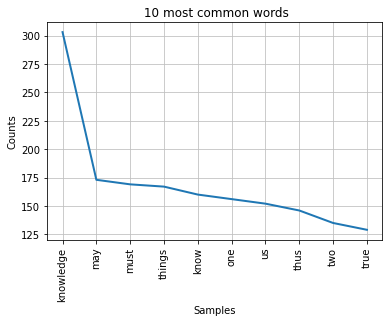

<AxesSubplot:title={'center':' 10 most common words'}, xlabel='Samples', ylabel='Counts'>

In [48]:
#The Problems of Philosophy
from nltk.corpus import stopwords
import matplotlib
from nltk.probability import FreqDist
stopwords.words('english')
#print(stopwords.words('english'))
text=(re.sub("\s+", " ", site.text)).lower()
token =nltk.word_tokenize(text)
tokens_wosw = [word for word in token if not word in stopwords.words('english')]
words = [word for word in tokens_wosw if word.isalpha()]
fdist_filtered = FreqDist(words)
top = fdist_filtered.most_common()
print(top[:10])
fdist_filtered.plot(10,title=' 10 most common words')


[('one', 445), ('man', 239), ('even', 194), ('also', 166), ('perhaps', 158), ('every', 143), ('us', 138), ('good', 133), ('must', 132), ('may', 131)]


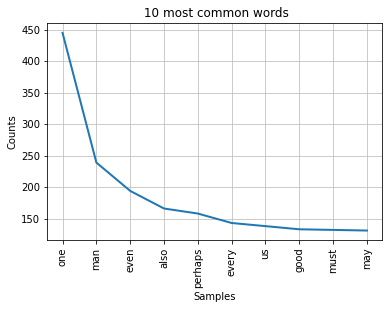

<AxesSubplot:title={'center':' 10 most common words'}, xlabel='Samples', ylabel='Counts'>

In [49]:
#Beyond Good and Evil,
from nltk.corpus import stopwords
import matplotlib
from nltk.probability import FreqDist
stopwords.words('english')
#print(stopwords.words('english'))
text=(re.sub("\s+", " ", site0.text)).lower()
token =nltk.word_tokenize(text)
tokens_wosw = [word for word in token if not word in stopwords.words('english')]
words = [word for word in tokens_wosw if word.isalpha()]
fdist_filtered = FreqDist(words)
top = fdist_filtered.most_common()
print(top[:10])
fdist_filtered.plot(10,title=' 10 most common words')


[('thou', 818), ('things', 554), ('unto', 439), ('man', 368), ('thy', 347), ('one', 338), ('thee', 312), ('nature', 273), ('doth', 252), ('either', 239)]


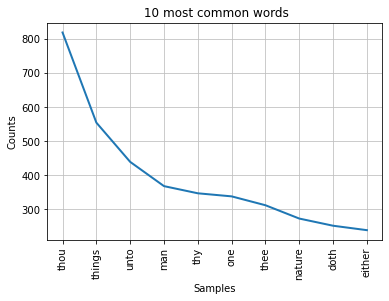

<AxesSubplot:title={'center':' 10 most common words'}, xlabel='Samples', ylabel='Counts'>

In [50]:
#" Meditations, by Marcus Aurelius:"
from nltk.corpus import stopwords
import matplotlib
from nltk.probability import FreqDist
stopwords.words('english')
#print(stopwords.words('english'))
text=(re.sub("\s+", " ", site1.text)).lower()
token =nltk.word_tokenize(text)
tokens_wosw = [word for word in token if not word in stopwords.words('english')]
words = [word for word in tokens_wosw if word.isalpha()]
fdist_filtered = FreqDist(words)
top = fdist_filtered.most_common()
print(top[:10])
fdist_filtered.plot(10,title=' 10 most common words')

<span style="color:red"> INSERT AN INTERPRETATION OF YOUR RESULTS HERE </span>

<hr> 

# Part 2: Text normalization 
Text normalization is an essential preliminary step to any natural language processing pipeline. To begin, let's re-import `The Problems of Philosophy`

In [51]:
website  = 'http://www.gutenberg.org/cache/epub/5827/pg5827.txt'
text     = requests.get(website).text

### Tokenization
As you saw in `Learning Exercise 1`, tokenization of text can be performed through the use of Regular Expressions. Familiarity with Regular Expressions is an important part of any NLP apprentice's toolkit but fortunately, it's not the only (or even the best) tool that exists for text normalization tasks! Indeed, for basic text normalization and cleansing, Python has a number of functions that operate on strings directly - no libraries required! 

Let's begin this section of the tutorial by taking a look at some of these functions, starting with the `replace` function to remove the whitespace characters in our text data:

In [52]:
#Replace \r\n with whitespace, then replace \n with whitespace, then replace \r with whitespace
clean_text = text.replace('\r\n',' ').replace('\n',' ').replace('\r',' ')

In [53]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('Before:\n' + text[1101:1227] + ' ...')
print('--------------------------------------------------------')
print('After:\n' + clean_text[1056:1177] + ' ...')
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
Before:


I have derived valuable assistance from unpublished writings of G. E.
Moore and J. M. Keynes: from the former, as regards ...
--------------------------------------------------------
After:
I have derived valuable assistance from unpublished writings of G. E. Moore and J. M. Keynes: from the former, as regards ...
--------------------------------------------------------




That seems to have worked! Notice that `replace` is a method that is built into Python strings. That's the reason that we write `text.replace(...)` and not something like `replace(text,...)`.  

Python has other many [other useful string manipulation methods](https://www.programiz.com/python-programming/methods/string), but for the rest of the basic pre-processing we'll be used in this tutorial, we'll only need `split`:

In [54]:
# Split the sentences when we see a '.' character
clean_text = clean_text.split('.')

# Split each sentence further - when there are no arguments provided to split, it defaults to whitespace (tabs, newlines, spaces, etc)
textmat = []
for c in clean_text:
    textmat.append(c.split())    
#re.split(r'\w+|\$[\d\.]+|\S+',"text")

In [55]:
# Printing the tenth sentence:
print('--------------------------------------------------------')
print('Results (showing sentence 10)')
print('--------------------------------------------------------')
print(textmat[10])
print('--------------------------------------------------------')
print('\n')

--------------------------------------------------------
Results (showing sentence 10)
--------------------------------------------------------
['I', 'have', 'also', 'profited', 'greatly', 'by', 'the', 'criticisms', 'and', 'suggestions', 'of', 'Professor', 'Gilbert', 'Murray']
--------------------------------------------------------




The pre-processing shown above is mostly for illustrative purposes. If we'd like to do anything serious, we'll need a more sophisticated approach to sentence segmentation and text tokenization. Fortunately, there are many existing tools in Python that assist with the Sentence segmentation and word tokenization. One of the most popular tools for this is the [Natural Langauge Toolkit](https://www.nltk.org/). Let's import the tool into python and explore some of it's functionality together:

In [56]:
# Importing the NLTK Package
import nltk

# Importing the `punkt` data, used by the NLTK tokenizer
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context



Now, let's test out the NLTK tokenizer with a tricky sentence

In [57]:
sentences = """At eight o'clock on Thursday morning Arthur didn't feel very good. He drove to the store in New York at 100 m.p.h.! He wanted to obtain some Kool-Aid! It cost $10.89."""
tokens    = nltk.word_tokenize(sentences)
print('\n')
print(tokens)
print('\n')



['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.', 'He', 'drove', 'to', 'the', 'store', 'in', 'New', 'York', 'at', '100', 'm.p.h.', '!', 'He', 'wanted', 'to', 'obtain', 'some', 'Kool-Aid', '!', 'It', 'cost', '$', '10.89', '.']




As you can see, the tokenization is pretty good for something out-of-the box, but it could be better! In an ideal world, we would want the Tokenizer to understand that `New York` is actually a single token, not two. Furthermore, depending on our use case, we may want the `$` sign to be attached to the `10.89` token. So, if you wanted to use the NLTK tool out-of-the-box, you may need to do some additional pre-processing. Let's try the sentence splitting functionality next:

In [58]:
result = nltk.sent_tokenize(sentences)
print('\n' + str(result) + '\n')


["At eight o'clock on Thursday morning Arthur didn't feel very good.", 'He drove to the store in New York at 100 m.p.h.!', 'He wanted to obtain some Kool-Aid!', 'It cost $10.89.']



This one also works rather nicely. Indeed, NLTK does a lot to make Natural Language Processing accessible. In fact, NLTK has several other tools that we will cover in subsequent lectures, but one of the tools that is not yet available in NLTK (at the time this tutorial was written) is Byte Pair Encoding, the tokenization approaches with some relation to many of today's NLP powerhouses (Yes, I'm talking about [BERT](https://en.wikipedia.org/wiki/BERT_(language_model))). I think I'm going to need some help with that...

<hr> 

## Learning Exercise 2:
#### Worth 1/5 Points

For this learning exercise, you will implement the Byte Pair Encoding (BPE) algorithm and use it to Tokenize `The Problems of Philosophy`. If you can't recall how the BPE algorithm works, you can refer back to the lectures, or see Section 2.4.3 of [Daniel Jurafsky & James H. Martin's NLP book](https://web.stanford.edu/~jurafsky/slp3/2.pdf). 

#### A. Download Books to Create a Larger Corpus
Given that the BPE algorithm is data-driven, we'll first need to gather a training data corpus. For your training data, you will choose at least 10 books from [Project Gutenburg](https://www.gutenberg.org/): 
* Choose at least 5 books that were authored by Bertrand Russell, not including `The Problems of Philosophy`
* Choose at least 5 books that were authored by Friedrich Nietzsche

You'll be using these training data later with BPE to identify the token `vocabularies`, which you will then use to tokenize `The problems of Philosophy`. 

In [59]:
import requests
#Bertrand Russell

website = ['https://www.gutenberg.org/files/55610/55610-0.txt',
           'https://www.gutenberg.org/cache/epub/4776/pg4776.txt',
           'https://www.gutenberg.org/files/37090/37090-0.txt',
           'https://www.gutenberg.org/cache/epub/690/pg690.txt',
           'https://www.gutenberg.org/cache/epub/2529/pg2529.txt']


#Friedrich Nietzsche
websiteNietzsche = ['https://www.gutenberg.org/cache/epub/19322/pg19322.txt',
                    'https://www.gutenberg.org/files/52915/52915-0.txt',
                    'https://www.gutenberg.org/files/52190/52190-0.txt',
                    'https://www.gutenberg.org/files/37841/37841-0.txt',
                    'https://www.gutenberg.org/cache/epub/5652/pg5652.txt']
def trainingdata(website):
    for i in website:
        site=requests.get(i)
        texts=(re.sub("\s+", " ", site.text)).lower()
        return texts


#print(trainingdata(website))

#token =nltk.word_tokenize(texts)
#(' '.join(create_new_sentence(15, 'keeps')))

<span style="color:red"> INSERT AN INTERPRETATION OF YOUR RESULTS HERE </span>

#### B. Implement Byte Pair Encoding
Implement the Byte Pair Encoding algorithm by filling out the function skeleton below. The function should take three inputs:

* `text` : an unprocessed text file that we wish to tokenize using BPE
* `k`    : the number of merges to perform
* `training_corpus` : a python list of complete texts we wish to use for training. The formatting should look like: `['blah blah blah ...', 'the rain in spain ...', 'do pickles count as vegetables? ...']`

The function should output a tokenized version of the `text` based on the `k` vocabulary units learned by BPE using the `training_corpus`.

In [82]:
import re
from collections import Counter, defaultdict
text=trainingdata(website)

def vocabulary(text):
    tokens = [" ".join(word) + " </w>" for word in text.split()]
    vocab = Counter(tokens)  
    return vocab

def get_stats(vocab):
    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency
    return pairs

def merge_vocab(pair, v_in):    
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

num_merges = 10  #k
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break

    
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)

#### C. Evaluate Byte Pair Encoding
Because BPE is data-driven, we might expect there to be some differences in the tokenization based on the training corpus, as well as your choice of `k`! To evaluate BPE, you will now experiment with how the tokenization performs for various settings of `k`, and when using different training . More specifically, you will compare the `vocabulary` and `tokenized_text` of Bertrand Russell's `The Problem's of Philosophy` for:

* values of `k` ranging from 1,000 to 10,000 in steps of 1,000 and
    *  `training_corpus` sets that include: (1) only Bertrand Russell books, (2) only Friedrich Nietzsche books, and (3) all books from groups (1) and (2).

For the above conditions, please generate one or more plots using Python's `matplotlib` that compare:
* The total number of unique tokens in the tokenized text
* The median size of tokens in the tokenized text
* The % overlap in the number of distinct unique tokens generated by BPE and NLTK's word tokenizer.

Compare the plots, and note any interesting observations about the results.

In [44]:
website = 'http://www.gutenberg.org/cache/epub/5827/pg5827.txt'
site    = requests.get(website)

<span style="color:red"> INSERT AN INTERPRETATION OF YOUR RESULTS HERE </span>

<hr> 

# Part 3: Edit Distance
#### Character Level Distance
As we discussed in the lectures, Edit Distance is a way to measure the similarity between different sequences of text. Our goal in this section will be to compare and contrast some of the different measures of edit distance that exist so that you'll have a better intuition for how to use them, depending on the problem you're trying to solve. To start, let's import the [`textdistance` library](https://github.com/life4/textdistance), written by [Gram Voronov](https://orsinium.dev/).

In [45]:
import textdistance

The `textdistance` library contains python implementations of about 30 edit distance algorithms. Let's begin by trying out the edit distance tool we discussed in class, the [Levenshtein Distance](https://en.wikipedia.org/wiki/Levenshtein_distance): 

In [46]:
def GetDistance(string1, string2, method):
    # Compute the distance and print the results
    distance = eval("textdistance." + method + "(string1, string2)")
    print('"' + string1 + '" and "' + string2 + '" is: ' + str(distance))  
    
print('\n')
print('levenshtein' + " distance:")
print('--------------------------------------------------------')
GetDistance('test','test'      ,'levenshtein')
GetDistance('test','texts'     ,'levenshtein')
GetDistance('test','test   '   ,'levenshtein')
print('--------------------------------------------------------')
print('\n')
    



levenshtein distance:
--------------------------------------------------------
"test" and "test" is: 0
"test" and "texts" is: 2
"test" and "test   " is: 3
--------------------------------------------------------




Recall from the lecture that the Levenshtein distance counts the total number of `insertion`, `deletion`, and `substitution` actions that a required to transform one string into another and the cost of each edit is always 1. So, as shown in the above example, moving from `"test"` to `"test"` requires no edits, and therefore has a distance of 0, moving from `"test"` to `"texts"` requires 1 substitution and one addition and therefore has a distance of 2, moving from `"test"` to `"   test"`   has a distance of 3 becasue we must remove the  three whitespace characters to the left of the word `"   test"` to create a match.

The above example is intentionally meant to highlight that the assumptions of the edit distance measures can have consequence for their estimates; Indeed, depending on the problem we are trying to solve, we may want `"   test"` and `"test"` to be closer than the distance between `"test"` and `"texts"`. On that note, let's explore the performance of three other edit distance measures: the [Hamming Distance](https://en.wikipedia.org/wiki/Hamming_distance), [Needleman Wunsch](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm), and [Smith Waterman](https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm):

In [47]:
distance_measures = ['hamming',  'levenshtein', 'needleman_wunsch', 'smith_waterman']

for method in distance_measures:
    print(method + " distance:")
    print('--------------------------------------------------------')
    GetDistance('test'      ,'test'      ,method)
    GetDistance('test'      ,'texts'     ,method)
    GetDistance('test'      ,'   test'   ,method)
    print('--------------------------------------------------------')
    print('\n')
    


hamming distance:
--------------------------------------------------------
"test" and "test" is: 0
"test" and "texts" is: 2
"test" and "   test" is: 6
--------------------------------------------------------


levenshtein distance:
--------------------------------------------------------
"test" and "test" is: 0
"test" and "texts" is: 2
"test" and "   test" is: 3
--------------------------------------------------------


needleman_wunsch distance:
--------------------------------------------------------
"test" and "test" is: 4.0
"test" and "texts" is: 2.0
"test" and "   test" is: 1.0
--------------------------------------------------------


smith_waterman distance:
--------------------------------------------------------
"test" and "test" is: 4
"test" and "texts" is: 2.0
"test" and "   test" is: 4.0
--------------------------------------------------------




Let's step through these results together. First, we notice that the Hamming distance between `"test"` and `"   test"` is 6, which is even higher than what we observed for the Levenshtein distance! To understand why, we can refer to the definition of the [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance): "The Hamming distance between two strings is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other." Given that there are so many white space characters, and that Hamming is only concerned with substitutions, it makes sense that the hamming distance would be higher than the levenshtein distance!

At first glance, the results of the [Needleman Wunch](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm) and [Smith Waterman](https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm) methods seem suprising. Why is the distance between "test" and "test" 4? Shouldn't it be 0? Once again, the answer here resides in understanding the definition of the "distance" metric. Both of these algorithms are actually providing an **alignment score** between the two sequences. 

Of course, we may also notice that the scores between the two alignment methods are quite different; the reason for this difference has to do with what these alignment scores are exactly measuring: the Smith–Waterman algorithm is designed to find the *segments* in two sequences that have maximal similarities while the Needleman–Wunsch algorithm is designed for alignment between two complete sequences. Let's explore these two methods to make this distinction a little more clear:

In [48]:
distance_measures = ['needleman_wunsch', 'smith_waterman']
for method in distance_measures:
    print(method + " distance:")
    print('--------------------------------------------------------')
    GetDistance('test','test',method)
    GetDistance('test',' test',method)
    GetDistance('test','  test',method)
    GetDistance('test','   test',method)
    GetDistance('test','    test',method)
    GetDistance('test','     test',method)
    GetDistance('test','      test',method)
    GetDistance('test','       test',method)
    print('\n')
   

needleman_wunsch distance:
--------------------------------------------------------
"test" and "test" is: 4.0
"test" and " test" is: 3.0
"test" and "  test" is: 2.0
"test" and "   test" is: 1.0
"test" and "    test" is: 0.0
"test" and "     test" is: -1.0
"test" and "      test" is: -2.0
"test" and "       test" is: -3.0


smith_waterman distance:
--------------------------------------------------------
"test" and "test" is: 4
"test" and " test" is: 4.0
"test" and "  test" is: 4.0
"test" and "   test" is: 4.0
"test" and "    test" is: 4.0
"test" and "     test" is: 4.0
"test" and "      test" is: 4.0
"test" and "       test" is: 4.0




As we can see above, the Needleman Wunsh method grows more negative as the absolute difference between the two strings increases. In this sense, the Needleman-Wunsch algorithm is similar to the Levenshtein distance algorithm; the difference being that Levenshtein uses a static penalty cost to any mismatched letters while the Needleman-Wunsch algorithm gives weights to matches and mismatches differently. The Smith Waterman method distance remains 4 because the substring `test` overlaps in both strings regardless of the whitespace.

#### Token-Level distance
All of our edit distance work up until now has focused on character-level distances and alignment but depending on the problem we want to solve, we may care more about distance at the token level. Fortunately, there are several distance metrics that measure similarity between strings at the token level. One such measure is the [Jaccard Index](https://en.wikipedia.org/wiki/Jaccard_index), which is the size of the intersection of the token sets divided by the size of the union of the sample sets. Here's an example:

In [49]:
distance_measures = ['jaccard']
text1 = "The fish was delish, and it made quite a dish"
text2 = "The fish on the dish was made quite delicious!"
text3 = "Joe eats crabs, crabs do not taste good."
for method in distance_measures:
    print(method + " distance:")
    print('--------------------------------------------------------')
    GetDistance(text1      ,text2      ,method)
    GetDistance(text1      ,text3      ,method)
    print('--------------------------------------------------------')
    print('\n')

jaccard distance:
--------------------------------------------------------
"The fish was delish, and it made quite a dish" and "The fish on the dish was made quite delicious!" is: 0.7843137254901961
"The fish was delish, and it made quite a dish" and "Joe eats crabs, crabs do not taste good." is: 0.39344262295081966
--------------------------------------------------------




We won't be covering all the edit distance functions of the NLP community in great detail, but hopefully this is enough to whet your appetite, and allow you to dig into some of the methods on your own.

<hr> 

## Learning Exercise 3:
#### Worth 1/5 Points
#### A. Towards a More Nuanced Edit Distance Cost Metric
As we've eluded to here and in the lectures, one deficiency of the Levenshtein cost metric is the assumption that substitutions, edit, and deletion costs are all equal. Your goal for this learning exercise is to modify the cost structure of the `LevenshteinDistanceDP` method shown below so that is assigns 1/2 of the normal penalty for any edits that involve whitespace characters (FYI, the implementation shown below was originally written by [Ahmed Gad](https://blog.paperspace.com/author/ahmed/), [here](https://blog.paperspace.com/implementing-levenshtein-distance-word-autocomplete-autocorrect/#:~:text=The%20Levenshtein%20distance%20is%20a,representing%20the%20distance%20between%20them.&text=In%20this%20tutorial%20the%20Levenshtein,using%20the%20dynamic%20programming%20approach.)). 

In [50]:
import numpy as np
def levenshteinDistanceDP(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
                
            
            elif(token1[t1-1] != token2[t2-1]):
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if token1[t1-1]==" " and token2[t2-1]!=" ":
                    if (a <= b  and a <= c):
                        distances[t1][t2] = a + 0.5
                    elif (b <= a and b <= c):
                        distances[t1][t2] = b + 0.5
                    else:
                        distances[t1][t2] = c + 0.5
                        
                elif token2[t2-1]==" " and token1[t1-1]!=" ":
                    if (a <= b  and a <= c):
                        distances[t1][t2] = a + 0.5
                    elif (b <= a and b <= c):
                        distances[t1][t2] = b + 0.5
                    else:
                        distances[t1][t2] = c + 0.5
                        
                elif token2[t2-1]==" " and token1[t1-1]==" ":
                    if (a <= b  and a <= c):
                        distances[t1][t2] = a + 0.5
                    elif (b <= a and b <= c):
                        distances[t1][t2] = b + 0.5
                    else:
                        distances[t1][t2] = c + 0.5         
                              
                else:

                    if (a <= b  and a <= c):
                        distances[t1][t2] = a + 1
                    elif (b <= a and b <= c):
                        distances[t1][t2] = b + 1
                    else:
                        distances[t1][t2] = c + 1
                            
                        
                        

    return distances[len(token1)][len(token2)]



levenshteinDistanceDP('  test', 'test')

2.0

<hr> 

# Part 4: N-Gram language Models
In this section, we'll be covering n-gram language models which, as the name implies, are language models that use n-grams!

#### N-grams
An n-gram is a contiguous sequence of n items from a given sample of text or speech. Let's begin this section by defining a function that generates n-grams from our text data using the `nltk` library and using it to extract n-grams for n ranging from 1-5.

In [51]:
import nltk
from nltk.util import ngrams

# an ngram extractor 
def extract_word_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

# some example text
data = """a fish keeps for a day; a fish keeps well if you put it in a cold place. 
          a fish keeps best if you put it in the fridge. If you’ll be having fish, 
          have it with an apple because one apple a day keeps the doctor away! 
          You know they also say that a day keeps coming."""

# printing the first 5 tokens after gramification
print("\nWord-Level:")
print("1-gram: ", extract_word_ngrams(data, 1)[0:5])
print("2-gram: ", extract_word_ngrams(data, 2)[0:5])
print("3-gram: ", extract_word_ngrams(data, 3)[0:5])
print("4-gram: ", extract_word_ngrams(data, 4)[0:5])
print("\n")


Word-Level:
1-gram:  ['a', 'fish', 'keeps', 'for', 'a']
2-gram:  ['a fish', 'fish keeps', 'keeps for', 'for a', 'a day']
3-gram:  ['a fish keeps', 'fish keeps for', 'keeps for a', 'for a day', 'a day ;']
4-gram:  ['a fish keeps for', 'fish keeps for a', 'keeps for a day', 'for a day ;', 'a day ; a']




Notice that the n-gram extractor I use above leverages the `nltk` tokenizer that we discussed earlier in this assignment. Also, that sample data I showed above should look familiar... As we discussed in the lectures, n-grams can be generated at whatever level of resolution we need for the task at hand; we also don't need any fancy libraries to generate them! If we were interested in extracting n-grams at the character level for instance, we could do that in one line:

In [52]:
# some example text
data = """a fish keeps for a day; a fish keeps well if you put it in a cold place. 
          a fish keeps best if you put it in the fridge. If you’ll be having fish, 
          have it with an apple because one apple a day keeps the doctor away! 
          You know they also say that a day keeps coming."""

def extract_char_ngrams(data, num):
    return [data[i:i+num] for i in range(len(data))][:(-num-1)]

# printing the first 5 tokens after gramification
print("\nCharacter-Level:")
print("1-gram: ", extract_char_ngrams(data, 1)[0:5])
print("2-gram: ", extract_char_ngrams(data, 2)[0:5])
print("3-gram: ", extract_char_ngrams(data, 3)[0:5])
print("4-gram: ", extract_char_ngrams(data, 4)[0:5])
print("\n")


Character-Level:
1-gram:  ['a', ' ', 'f', 'i', 's']
2-gram:  ['a ', ' f', 'fi', 'is', 'sh']
3-gram:  ['a f', ' fi', 'fis', 'ish', 'sh ']
4-gram:  ['a fi', ' fis', 'fish', 'ish ', 'sh k']




#### Skip-Grams
While n-grams bring together contiguous sequences of words, skip-grams include grams that skip over certain terms!

In [53]:
# some example text
data = """a fish keeps for a day; a fish keeps well if you put it in a cold place. 
          a fish keeps best if you put it in the fridge. If you’ll be having fish, 
          have it with an apple because one apple a day keeps the doctor away! 
          You know they also say that a day keeps coming."""

# Creating skip-grams using the NLTK library
skip_gram = list(nltk.skipgrams(nltk.word_tokenize(data),n=3,k=5))
skip_gram[0:20]

[('a', 'fish', 'keeps'),
 ('a', 'fish', 'for'),
 ('a', 'fish', 'a'),
 ('a', 'fish', 'day'),
 ('a', 'fish', ';'),
 ('a', 'fish', 'a'),
 ('a', 'keeps', 'for'),
 ('a', 'keeps', 'a'),
 ('a', 'keeps', 'day'),
 ('a', 'keeps', ';'),
 ('a', 'keeps', 'a'),
 ('a', 'for', 'a'),
 ('a', 'for', 'day'),
 ('a', 'for', ';'),
 ('a', 'for', 'a'),
 ('a', 'a', 'day'),
 ('a', 'a', ';'),
 ('a', 'a', 'a'),
 ('a', 'day', ';'),
 ('a', 'day', 'a')]

#### Language Models 
A language model refers to any method that assign probabilities to strings. Let's try to develop a more concrete understanding of language models by building a simple one together. More specifically, let's build a model that tries to predict the next word in a sentence, given the last word we saw. One approach to accomplish this is to simply count, for each unique word, what words tend to follow it. To do that, let's start by using the `extract_word_ngrams` tool we showed earlier, and collect all the unique words in the corpus:

In [54]:
# some example text
data = """a fish keeps for a day; a fish keeps well if you put it in a cold place. 
          a fish keeps best if you put it in the fridge. If you’ll be having fish, 
          have it with an apple because one apple a day keeps the doctor away! 
          You know they also say that a day keeps coming."""

unigrams = extract_word_ngrams(data,1)
print(unigrams)
# get the unique words:
vocabulary = list(set(unigrams))
print('---------------------------------------')
print('Vocabulary (n = ' + str(len(vocabulary)) +')')
print('---------------------------------------')
print(str(vocabulary) + '\n')

['a', 'fish', 'keeps', 'for', 'a', 'day', ';', 'a', 'fish', 'keeps', 'well', 'if', 'you', 'put', 'it', 'in', 'a', 'cold', 'place', '.', 'a', 'fish', 'keeps', 'best', 'if', 'you', 'put', 'it', 'in', 'the', 'fridge', '.', 'If', 'you', '’', 'll', 'be', 'having', 'fish', ',', 'have', 'it', 'with', 'an', 'apple', 'because', 'one', 'apple', 'a', 'day', 'keeps', 'the', 'doctor', 'away', '!', 'You', 'know', 'they', 'also', 'say', 'that', 'a', 'day', 'keeps', 'coming', '.']
---------------------------------------
Vocabulary (n = 40)
---------------------------------------
['away', 'that', 'they', ';', '.', 'it', 'the', 'cold', 'have', 'put', 'keeps', 'well', 'doctor', 'be', '!', 'll', 'you', 'with', 'one', 'day', 'in', 'apple', 'know', 'a', 'because', 'fridge', 'say', 'for', 'also', 'You', ',', 'If', 'if', 'best', 'an', 'having', 'coming', 'fish', '’', 'place']



Now that we have a list of the words, lets initialize a `JSON` object called `counts` that will keep track of the next word, given the current word.

In [55]:
counts = {}

for given_word in vocabulary:
    counts[given_word] = {}
    #print (counts)
    for next_word in vocabulary:
        counts[given_word][next_word] = 0
           

The `counts` object is a dictionary of dictionaries. It's convenient to store the count data this way because we can see the counts of the next word, given the current word, by simply providing the count object the current word. Let's take a look at the count of all possible next words, given that the current word is `fish`:

In [56]:
print('------------------------------------------------------')
print('Count of next words, given that current word is "fish"')
print('------------------------------------------------------')
print(counts['fish'])
print('\n')

------------------------------------------------------
Count of next words, given that current word is "fish"
------------------------------------------------------
{'away': 0, 'that': 0, 'they': 0, ';': 0, '.': 0, 'it': 0, 'the': 0, 'cold': 0, 'have': 0, 'put': 0, 'keeps': 0, 'well': 0, 'doctor': 0, 'be': 0, '!': 0, 'll': 0, 'you': 0, 'with': 0, 'one': 0, 'day': 0, 'in': 0, 'apple': 0, 'know': 0, 'a': 0, 'because': 0, 'fridge': 0, 'say': 0, 'for': 0, 'also': 0, 'You': 0, ',': 0, 'If': 0, 'if': 0, 'best': 0, 'an': 0, 'having': 0, 'coming': 0, 'fish': 0, '’': 0, 'place': 0}




As we can see, the counts are currently empty; that's because we've only just initialized this object and haven't actually counted anything yet! Let's do that now.

In [57]:
for i in range(len(unigrams)-1):
    counts[unigrams[i]][unigrams[i+1]] += 1
#print(counts)    

Now let's take a look at that `fish` count again!

In [58]:
print('------------------------------------------------------')
print('Count of next words, given that current word is "well"')
print('------------------------------------------------------')
print(counts['well'])

print('\n')
print('------------------------------------------------------')
print('Count of next word "keeps", given that current word is "fish"')
print('------------------------------------------------------')
print(counts['well']['keeps'])

print('\n')

------------------------------------------------------
Count of next words, given that current word is "well"
------------------------------------------------------
{'away': 0, 'that': 0, 'they': 0, ';': 0, '.': 0, 'it': 0, 'the': 0, 'cold': 0, 'have': 0, 'put': 0, 'keeps': 0, 'well': 0, 'doctor': 0, 'be': 0, '!': 0, 'll': 0, 'you': 0, 'with': 0, 'one': 0, 'day': 0, 'in': 0, 'apple': 0, 'know': 0, 'a': 0, 'because': 0, 'fridge': 0, 'say': 0, 'for': 0, 'also': 0, 'You': 0, ',': 0, 'If': 0, 'if': 1, 'best': 0, 'an': 0, 'having': 0, 'coming': 0, 'fish': 0, '’': 0, 'place': 0}


------------------------------------------------------
Count of next word "keeps", given that current word is "fish"
------------------------------------------------------
0




Now that we have a count of the words, we can convert these to probabilities by simply dividing by the total incidence of next words, for a given current word:

In [59]:
# initialize the probabilites JSON object
probs = {}
for given_word in vocabulary:
    probs[given_word] = {}
    for next_word in vocabulary:
        probs[given_word][next_word] = 0

# convert the counts to probabilites
for key, value in counts.items():
    denominator = 0
    for key2, value2 in counts[key].items():
        denominator += value2

    for key2, value2 in counts[key].items():
        probs[key][key2] = value2 / denominator
    

Now, let's check the probability of the next word being `keeps`, given that the current word is `fish` 

In [60]:
print('------------------------------------------------------')
print('The probability of the next word being keeps,') 
print('given that the current word is fish:')
print('------------------------------------------------------')
print(str(100*probs['fish']['keeps']) + '%')
print('\n')

------------------------------------------------------
The probability of the next word being keeps,
given that the current word is fish:
------------------------------------------------------
75.0%




And there you have it! You have built your first data-driven language model. Congratulations! Now let's get to work doing some fun things with the language model, like simulating new sentences. Let's do that by choosing a word, and then selecting the next word in accordance to the probability given by our language model:

In [61]:
import numpy as np

def sample_next_gram_from_language_model(probs, given_token):
    distribution            = list(probs[given_token].values())
    #print (distribution)
    sample_from_multinomial = np.random.multinomial(1,distribution)
    sample_index            = np.where(sample_from_multinomial==1)[0][0]
    word_keys               = list(probs[given_token].keys())
    next_word               = word_keys[sample_index]
    return(next_word)
    
given_token = "keeps"
next_token  = sample_next_gram_from_language_model(probs,given_token)

print(' Given the token :  ' + given_token)
print(' The next token is :  ' + next_token)
print('\n')


 Given the token :  keeps
 The next token is :  for




Now that we have a language model built, we can do all sorts of useful things. Including running our model to generate new sentences we've never seen before:

In [62]:
def create_new_sentence(length, seed_token):
    tokens = [seed_token]
    for i in range(length):
        tokens.append(sample_next_gram_from_language_model(probs,tokens[-1]))
        #print(tokens)
    return tokens

      
print('---------------------------------------')
print(' '.join(create_new_sentence(15, 'keeps')))
print(' '.join(create_new_sentence(10, 'keeps')))
print(' '.join(create_new_sentence(10, 'keeps')))

---------------------------------------
keeps for a fish keeps coming . a fish , have it in the fridge .
keeps coming . a fish keeps best if you put it
keeps best if you put it with an apple a fish


<hr> 

## Learning Exercise 4:
#### Worth 2/5 Points
Now that you have built your first language model, let's turn our attention back to the philosophers. For this final learning exercise, you will be building a tri-gram `Nietzsche language model`, and a tri-gram `Russel Language Model` using the 5 books from each of the philosophers you collected from Project Gutenburg earlier. 

Generate a conversation between your philosophers models by seeding one of the models with a tri-gram and allow it to run until it generates a terminating character (a '.', '?' or '!'). Then, have the other model generate a response by providing the ending tri-gram of the the first model as the seed tri-gram for the other model. Iterate like this for 15 sentences and print the text.

**Note:** You probably learned from the earlier components of this assignment that Nietzsche and Russel have slightly different writing styles (yes, that was an understatement). For this reason, there are likely to be instances where the ending tri-gram from your Nietzsche model does not show up in the Russel language model and vice-versa. Use Laplace smoothing to handle this problem.   

In [63]:
import requests
import re
#Bertrand Russell
website = ['https://www.gutenberg.org/files/55610/55610-0.txt',
           'https://www.gutenberg.org/cache/epub/4776/pg4776.txt',
           'https://www.gutenberg.org/files/37090/37090-0.txt',
           'https://www.gutenberg.org/cache/epub/690/pg690.txt',
           'https://www.gutenberg.org/cache/epub/2529/pg2529.txt']


#Friedrich Nietzsche
websiteNietzsche = ['https://www.gutenberg.org/cache/epub/19322/pg19322.txt',
                    'https://www.gutenberg.org/files/52915/52915-0.txt',
                    'https://www.gutenberg.org/files/52190/52190-0.txt',
                    'https://www.gutenberg.org/files/37841/37841-0.txt',
                    'https://www.gutenberg.org/cache/epub/5652/pg5652.txt']
def trainingdata(website):
    trainingdata=[]
    for i in website:
        site=requests.get(i)
        texts=(re.sub("\s+", " ", site.text)).lower()
        trainingdata.append(texts)
    for text in  trainingdata:
        data =str( ''.join(trainingdata))
    return data


#print(trainingdata(website))

In [64]:
Russelldat=trainingdata(website)
Russell_language_model=extract_word_ngrams(data, 3)

data=trainingdata(websiteNietzsche)
Nietzsche_language_model=extract_word_ngrams(data, 3)
#print(Nietzschetrigram[-20:-1])

def seeds(trigram):
    for i in trigram:
        if not (trigram[-1]).endswith('.' or '!' or '?'):
            trigram.pop()
    return trigram


In [65]:
Nietzschetrigram=seeds(Nietzsche_language_model)
Nietzschetrigram[-1]
Russell_language_model=extract_word_ngrams(data, 3)

def conversation (Nietzsche,Russell):
    for i in Russell:
        conversation=Nietzsche[-1]+':'+i
        print(conversation)
        
        

In [66]:

conversation(Nietzschetrigram,Russell_language_model[:16])


express permission .:﻿the project gutenberg
express permission .:project gutenberg ebook
express permission .:gutenberg ebook of
express permission .:ebook of the
express permission .:of the antichrist
express permission .:the antichrist ,
express permission .:antichrist , by
express permission .:, by f.
express permission .:by f. w.
express permission .:f. w. nietzsche
express permission .:w. nietzsche this
express permission .:nietzsche this ebook
express permission .:this ebook is
express permission .:ebook is for
express permission .:is for the
express permission .:for the use


In [67]:
def conversations(Nietzsche,Russell):
    for i in Russell:
        for w in Nietzschetrigram:
            if Russell.index(i)==Nietzsche.index(w):
                conversations= w +" : "+ i
        print(conversations)


In [ ]:
Nietzschetrigram=seeds(Nietzsche_language_model)
reversedNietzsche=list(reversed(Nietzschetrigram))
Russell_language_model=extract_word_ngrams(data, 3)

print(conversations(reversedNietzsche,Russell_language_model)[:16])

<h1><span style="color:red"> Self Assessment </span></h1>
Please provide an assessment of how successfully you accomplished the learning exercises in this assignment according to the instruction provided; do not assign yourself points for effort. This self assessment will be used as a starting point when I grade your assignments. Please note that if you over-estimate your grade on a given learning exercise, you will face a 50% penalty on the total points granted for that exercise. If you underestimate your grade, there will be no penalty.

* Learning Exercise 1: 
    0.75/1 points
* Learning Exercise 2: 
    0.25/1 points
* Learning Exercise 3:
    0.75/1 points
* Learning Exercise 4:
    1.25/2 points

#### Total Grade: 
3/5